# Importing libraries and reading the file

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import defaultdict, Counter
from matplotlib.pyplot import plot
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
cols = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'credit_worthiness']

In [5]:
data = pd.read_csv('german.data', names = cols, delimiter=' ')

In [298]:
data.head()

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,credit_worthiness
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


In [222]:
data.count()

existingchecking         1000
duration                 1000
credithistory            1000
purpose                  1000
creditamount             1000
savings                  1000
employmentsince          1000
installmentrate          1000
statussex                1000
otherdebtors             1000
residencesince           1000
property                 1000
age                      1000
otherinstallmentplans    1000
housing                  1000
existingcredits          1000
job                      1000
peopleliable             1000
telephone                1000
foreignworker            1000
credit_worthiness        1000
dtype: int64

In [8]:
# data encoding

data['credit_worthiness'] = data['credit_worthiness'].map({1:1, 2:0})

# Exploratory data analysis

In [228]:
data.describe()

,duration,creditamount,installmentrate,residencesince,age,existingcredits,peopleliable,credit_worthiness
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [229]:
data.isnull().any()

existingchecking         False
duration                 False
credithistory            False
purpose                  False
creditamount             False
savings                  False
employmentsince          False
installmentrate          False
statussex                False
otherdebtors             False
residencesince           False
property                 False
age                      False
otherinstallmentplans    False
housing                  False
existingcredits          False
job                      False
peopleliable             False
telephone                False
foreignworker            False
credit_worthiness        False
dtype: bool

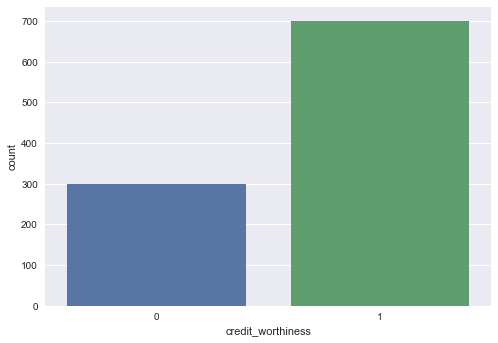

In [230]:
# data['statussex'].value_counts()
# data['housing'].value_counts()
# data['property'].value_counts()
# data['foreignworker'].value_counts()
# data['credit_worthiness'].value_counts()
sns.countplot(x='credit_worthiness',data=data)

In [231]:
data.info

<bound method DataFrame.info of     existingchecking  duration credithistory purpose  creditamount savings  \
0                A11         6           A34     A43          1169     A65   
1                A12        48           A32     A43          5951     A61   
2                A14        12           A34     A46          2096     A61   
3                A11        42           A32     A42          7882     A61   
4                A11        24           A33     A40          4870     A61   
..               ...       ...           ...     ...           ...     ...   
995              A14        12           A32     A42          1736     A61   
996              A11        30           A32     A41          3857     A61   
997              A14        12           A32     A43           804     A61   
998              A11        45           A32     A43          1845     A61   
999              A12        45           A34     A41          4576     A62   

    employmentsince  installmen

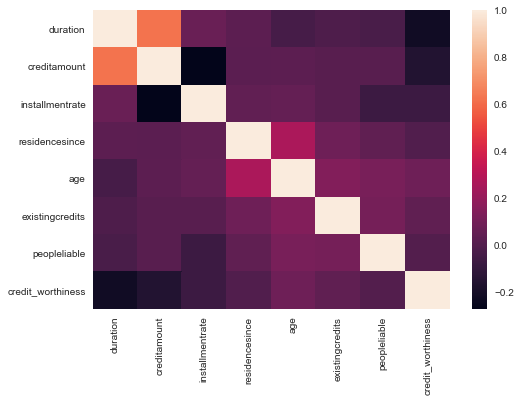

In [232]:
sns.heatmap(data.corr())

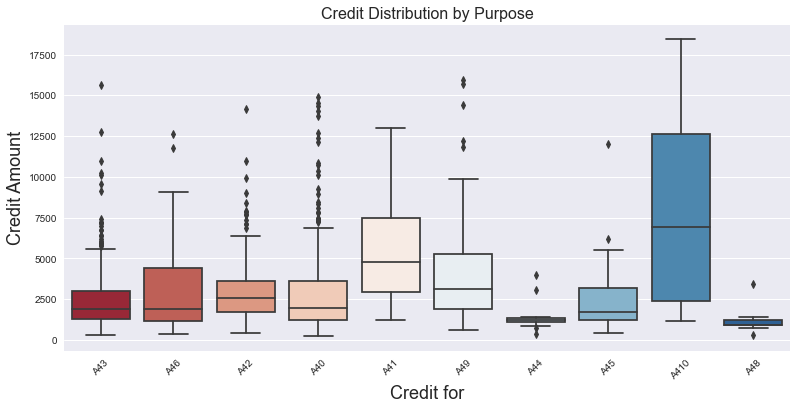

In [233]:
# credit distribution with purpose

import seaborn as sns

plt.figure(figsize=(13,6)) #figure size
g = sns.boxplot(x='purpose', y='creditamount', 
                   data=data, palette="RdBu")


g.set_title("Credit Distribution by Purpose", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g.set_xlabel('Credit for', fontsize=18) # Xlabel
g.set_ylabel('Credit Amount', fontsize=18) 
plt.show()

#customers buying cars have a higher mean of credit amount

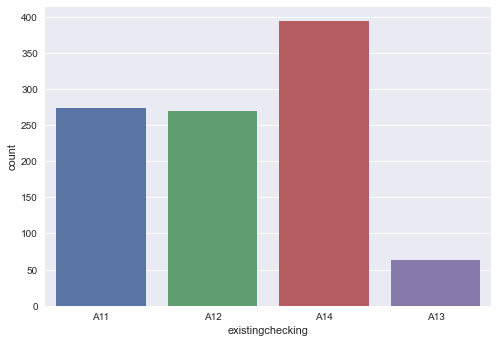

In [234]:
# credit distribution with status of existing checking account

sns.countplot(x='existingchecking',data=data)

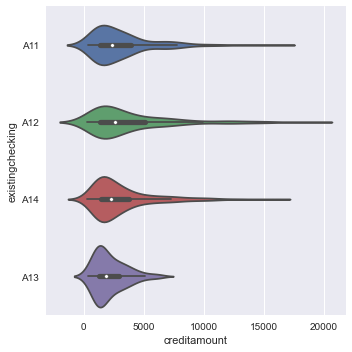

In [235]:
sns.catplot(x='creditamount',y='existingchecking',kind='violin',data=data)

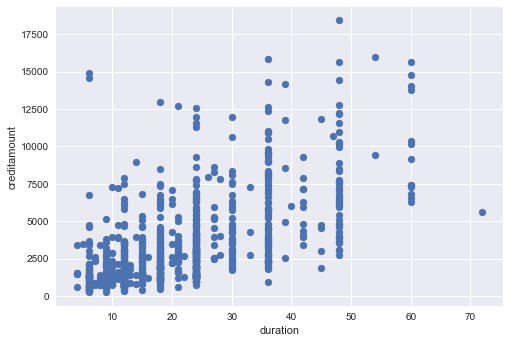

In [236]:
# credit amount vs duration

plt.scatter(data.duration,data.creditamount)
plt.xlabel("duration")
plt.ylabel("creditamount")
plt.show()

#longer the duration more the credit amount

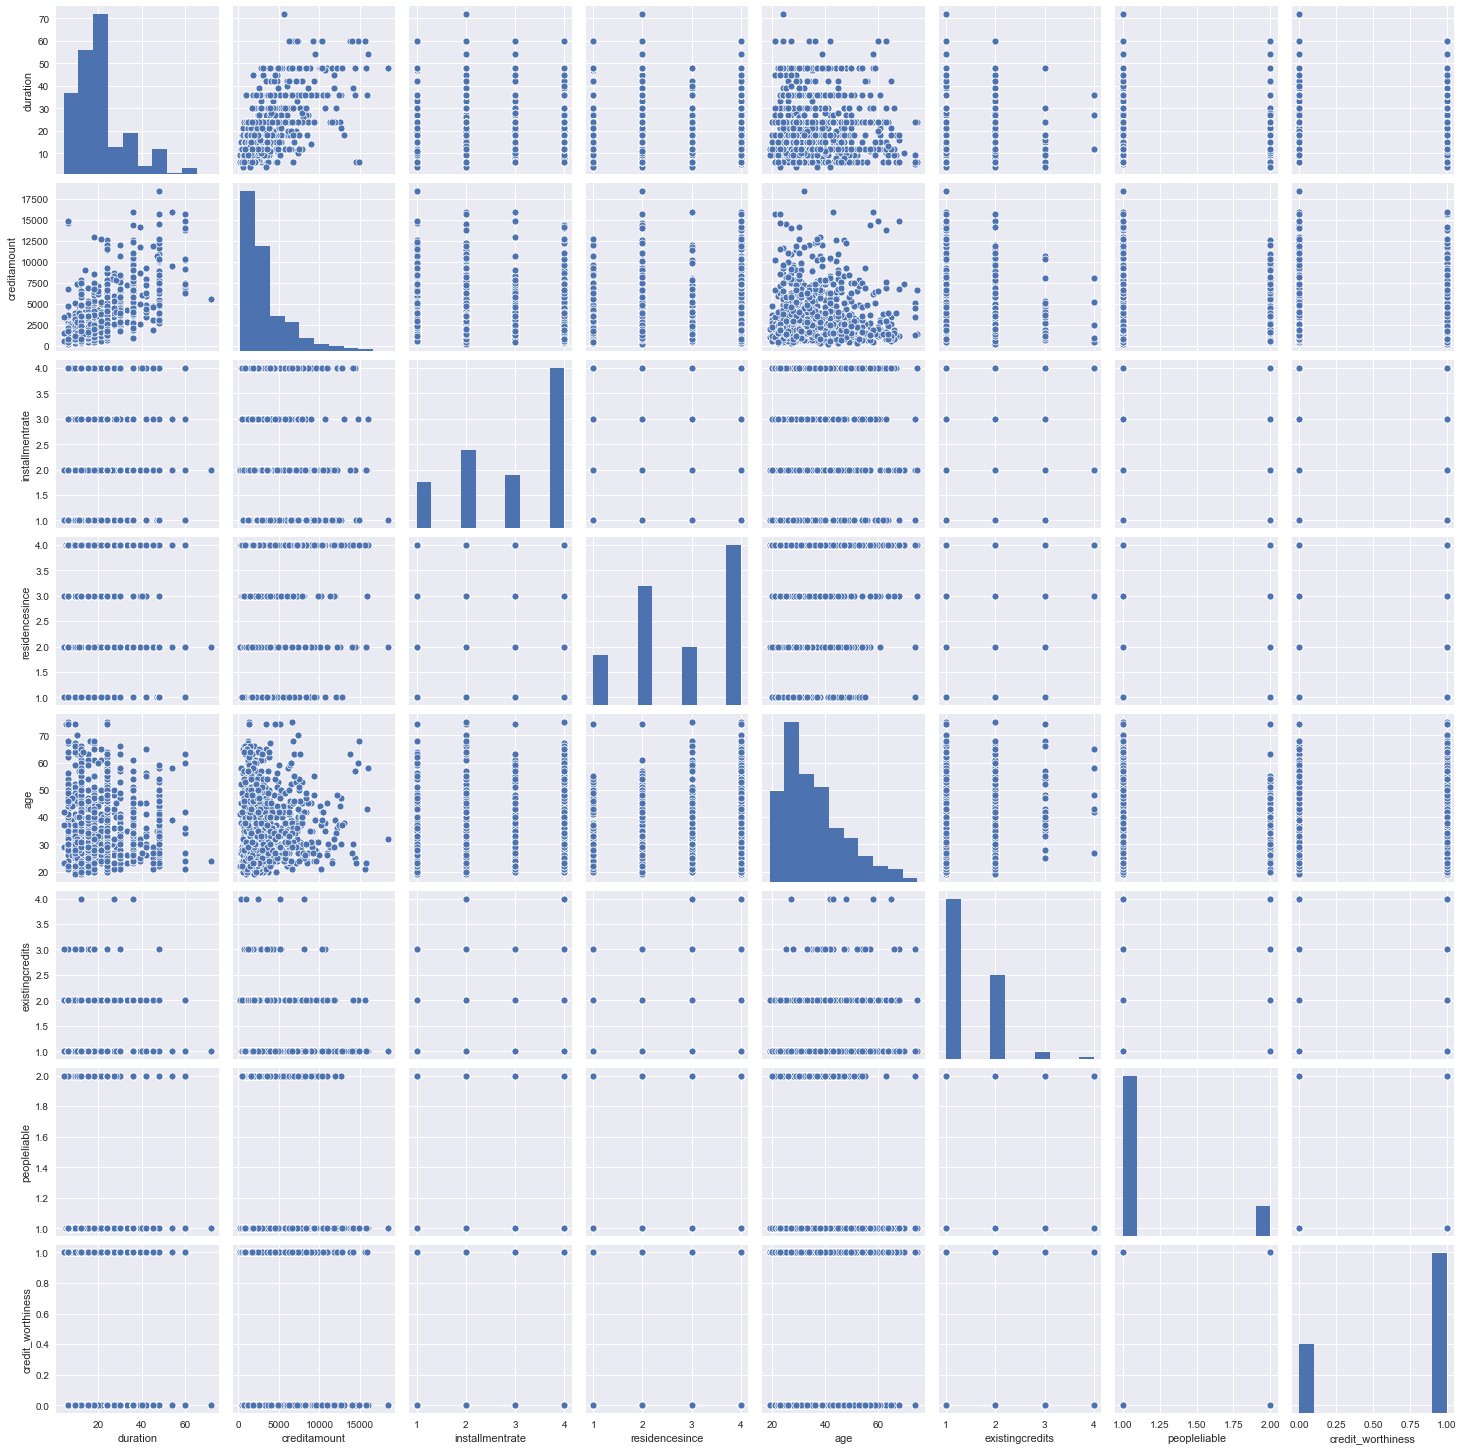

In [237]:
sns.pairplot(data)

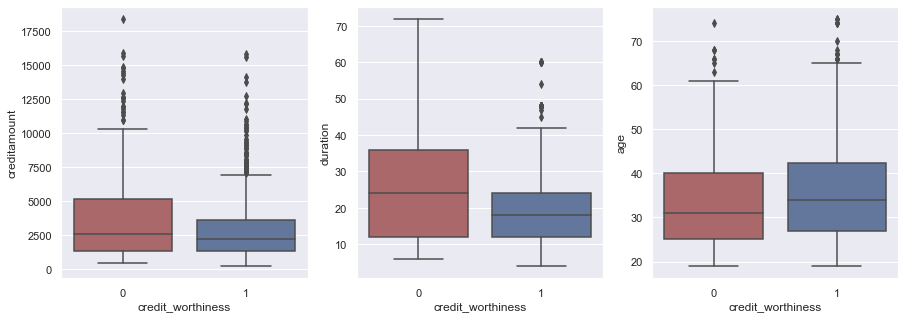

In [35]:
sns.set()
f, axes = plt.subplots(1, 3,figsize=(15,5))
sns.boxplot(y=data["creditamount"],x=data["credit_worthiness"],orient='v' , ax=axes[0],palette=["#B55D60","#5975A4"]) #box plot
sns.boxplot(y=data["duration"],x=data["credit_worthiness"], orient='v' , ax=axes[1],palette=["#B55D60","#5975A4"]) #box plot
sns.boxplot(y=data["age"],x=data["credit_worthiness"], orient='v' , ax=axes[2],palette=["#B55D60","#5975A4"]) #box plot
plt.show()

In [9]:
credit_history = pd.crosstab(data['credithistory'], data['credit_worthiness']).apply(lambda x: x/x.sum() * 100)
credit_history
# customers who have existing credits paid back duly and critical account holders having more than one credit accounts are more credit worthy

credit_worthiness,0,1
credithistory,,
A30,8.333333,2.142857
A31,9.333333,3.000000
A32,56.333333,51.571429
A33,9.333333,8.571429
A34,16.666667,34.714286


In [21]:
credit_history = pd.crosstab(data['employmentsince'], data['credit_worthiness']).apply(lambda x: x/x.sum() * 100)
credit_history
# younger people are more credit worthy

credit_worthiness,0,1
employmentsince,,
A71,7.666667,5.571429
A72,23.333333,14.571429
A73,34.666667,33.571429
A74,13.000000,19.285714
A75,21.333333,27.000000


In [29]:
credit_history = pd.crosstab(data['property'], data['credit_worthiness']).apply(lambda x: x/x.sum() * 100)
credit_history

credit_worthiness,0,1
property,,
A121,20.000000,31.714286
A122,23.666667,23.000000
A123,34.000000,32.857143
A124,22.333333,12.428571


In [31]:
credit_history = pd.crosstab(data['housing'], data['credit_worthiness']).apply(lambda x: x/x.sum() * 100)
credit_history
# customers with own house have a higher contribution 

credit_worthiness,0,1
housing,,
A151,23.333333,15.571429
A152,62.000000,75.285714
A153,14.666667,9.142857


In [24]:
credit_history = pd.crosstab(data['existingchecking'], data['credit_worthiness']).apply(lambda x: x/x.sum() * 100)
credit_history
# customers with no checking account are more credit worthy 

credit_worthiness,0,1
existingchecking,,
A11,45.000000,19.857143
A12,35.000000,23.428571
A13,4.666667,7.000000
A14,15.333333,49.714286


In [241]:
credit_history = pd.crosstab(data['savings'], data['credit_worthiness']).apply(lambda x: x/x.sum() * 100)
credit_history
# customers with no checking account are more credit worthy 

credit_worthiness,0,1
savings,,
A61,72.333333,55.142857
A62,11.333333,9.857143
A63,3.666667,7.428571
A64,2.000000,6.000000
A65,10.666667,21.571429


In [301]:
#one hot encoding

cat_v1 = data[['credit_worthiness','duration','creditamount','installmentrate','residencesince','age','existingcredits','peopleliable']]


# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(data[['existingchecking','credithistory','purpose','savings','employmentsince','statussex','otherdebtors','property','otherinstallmentplans','housing','job','telephone','foreignworker']]).toarray())
# merge with main df bridge_df on key values
bridge_df = cat_v1.join(enc_df)
bridge_df.head()




,credit_worthiness,duration,creditamount,installmentrate,residencesince,age,existingcredits,peopleliable,0,1,...,44,45,46,47,48,49,50,51,52,53
0,1,6,1169,4,4,67,2,1,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0,48,5951,2,2,22,1,1,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1,12,2096,2,3,49,1,2,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,42,7882,2,4,45,1,2,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0,24,4870,3,4,53,2,2,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [303]:
print(len(bridge_df.columns))

62


In [307]:
# target variable selection

X = bridge_df.iloc[:,1:62] 
y = bridge_df.iloc[:,0] 

# X.head()
y.head()

0    1
1    0
2    1
3    1
4    0
Name: credit_worthiness, dtype: int64

# training the model

In [308]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.head()

,duration,creditamount,installmentrate,residencesince,age,existingcredits,peopleliable,0,1,2,...,44,45,46,47,48,49,50,51,52,53
687,36,2862,4,3,30,1,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
500,24,3123,4,1,27,1,1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
332,60,7408,4,2,24,1,1,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
979,15,1264,2,2,25,1,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
817,6,1554,1,2,24,2,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [309]:
#Data preprocessing

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[ 1.26614168 -0.13370848  0.90367954 ... -0.83577138  0.19044535
  -0.19044535]
 [ 0.27024163 -0.04147715  0.90367954 ... -0.83577138  0.19044535
  -0.19044535]
 [ 3.25794179  1.47274219  0.90367954 ... -0.83577138  0.19044535
  -0.19044535]
 ...
 [-0.97463344  0.20906696 -1.79723067 ... -0.83577138  0.19044535
  -0.19044535]
 [-0.2277084  -0.46376236 -0.89692727 ... -0.83577138  0.19044535
  -0.19044535]
 [ 1.26614168  2.33816183 -1.79723067 ...  1.19649945  0.19044535
  -0.19044535]]


# Logistic regression

In [310]:
#Linear Binary Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [311]:
clf.fit(X_train, y_train)

LogisticRegression()

In [312]:
predictions = clf.predict(X_test)

**Model Evaluation**

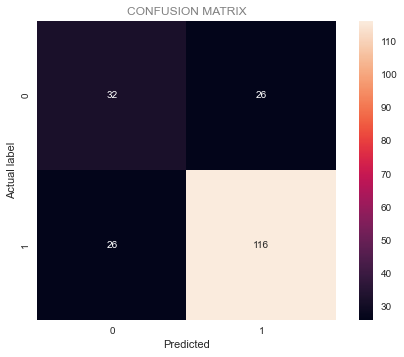

In [313]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,predictions)
sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True)
plt.ylabel('Actual label'),
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX",color = "grey")
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [314]:
print ("\n Classification report : \n",classification_report(y_test,predictions))
print ("Accuracy Score   : ",accuracy_score(y_test,predictions))
model_roc_auc = roc_auc_score(y_test,predictions) 
print ("Area under curve : ",model_roc_auc)


 Classification report : 
               precision    recall  f1-score   support

           0       0.55      0.55      0.55        58
           1       0.82      0.82      0.82       142

    accuracy                           0.74       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.74      0.74      0.74       200

Accuracy Score   :  0.74
Area under curve :  0.6843127731908694


In [315]:
sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(sensitivity)
print(metrics.recall_score(y_test, predictions))
print(specificity)
print(metrics.precision_score(y_test, predictions))

0.14485981308411214
0.5348837209302325
0.8169014084507042
0.8551401869158879
0.8169014084507042


In [319]:
# predict probabilities
pred_prob1 = clf.predict_proba(X_test)


from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [320]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

print(auc_score1)

0.718795531811559


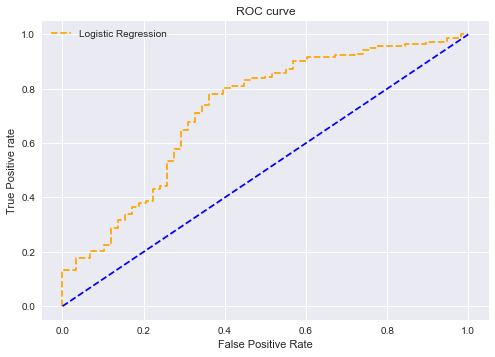

In [321]:
#ROC curve
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [322]:
# misclassification rate

from sklearn.metrics import accuracy_score

my_accuracy = 1-(accuracy_score(y_test, predictions, normalize=False) / float(y_test.size))
my_accuracy

0.26